## Análisis Exploratorio de Datos

Este notebook contiene un análisis exploratorio completo del dataset de viviendas en Madrid. Se incluyen análisis estadísticos, generación de visualizaciones y un resumen de hallazgos.

Este código ha utilizado un análisis exploratorio automático desarrollado por *manus.ai*.

In [1]:
import sys
import os
import pandas as pd
from dotenv import load_dotenv

load_dotenv() # Load the environment variables from .env file

import importlib
# Añadir la ruta al directorio src para importar módulos personalizados
sys.path.append("../src")
# Configuración de librerías y estilo para visualizaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Unload the module if already loaded
import idealista18.enricher as enricher

# Crear directorio para gráficos
os.makedirs('descriptivos', exist_ok=True)
os.makedirs('descriptivos/figuras', exist_ok=True)

In [2]:
# Configuración para visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set(font_scale=1.2)


In [3]:
# Load and clean data for Madrid
# Load data and remove outliers (spatial)
CITY = "Madrid"

df = enricher.load_enriched_data(city_name=CITY, 
                                          deduplicate_by_adid=True,
                                          enrich_census_code=False, 
                                          enrich_idealista_areas=False)


print("Data loaded:")
print(df.head())

Data loaded:
                 ASSETID   PRICE    UNITPRICE ADTYPOLOGYID ADOPERATIONID  \
0  A15019136831406238029  126000  2680.851064         HOME          SALE   
1   A6677225905472065344  235000  4351.851852         HOME          SALE   
2  A13341979748618524775  373000  4973.333333         HOME          SALE   
3   A4775182175615276542  284000  5916.666667         HOME          SALE   
4   A2492087730711701973  228000  4560.000000         HOME          SALE   

   CONSTRUCTEDAREA  ROOMNUMBER  BATHNUMBER  HASTERRACE  HASLIFT  ...  \
0               47           1           1           0        1  ...   
1               54           1           1           0        0  ...   
2               75           2           1           0        0  ...   
3               48           1           1           0        1  ...   
4               50           0           1           0        0  ...   

   DISTANCE_TO_METRO  DISTANCE_TO_CASTELLANA  LONGITUDE   LATITUDE  CITYNAME  \
0           0.872

In [4]:
# Información básica del dataset
print('\n--- INFORMACIÓN BÁSICA DEL DATASET ---')
print(f'Número de registros: {df.shape[0]}')
print(f'Número de variables: {df.shape[1]}')

# Guardar información básica en un archivo
with open('descriptivos/info_basica.txt', 'w') as f:
    f.write(f'Número de registros: {df.shape[0]}\n')
    f.write(f'Número de variables: {df.shape[1]}\n')
    f.write('\nPrimeras 5 filas del dataset:\n')
    f.write(df.head().to_string())
    f.write('\n\nTipos de datos:\n')
    f.write(df.dtypes.to_string())


--- INFORMACIÓN BÁSICA DEL DATASET ---
Número de registros: 75803
Número de variables: 48


In [5]:
# Análisis de valores faltantes
print('\n--- ANÁLISIS DE VALORES FALTANTES ---')
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Valores faltantes': missing_values,
    'Porcentaje (%)': missing_percentage
})
missing_df = missing_df[missing_df['Valores faltantes'] > 0].sort_values('Porcentaje (%)', ascending=False)
print(missing_df)

# Guardar información de valores faltantes
missing_df.to_csv('descriptivos/valores_faltantes.csv')


--- ANÁLISIS DE VALORES FALTANTES ---
                    Valores faltantes  Porcentaje (%)
CONSTRUCTIONYEAR                45574       60.121631
FLATLOCATIONID                   5162        6.809757
FLOORCLEAN                       3114        4.108017
LOCATIONID                         68        0.089706
LOCATIONNAME                       68        0.089706
CUSEC                              68        0.089706
CADASTRALQUALITYID                  1        0.001319


In [6]:
# Análisis estadístico de variables numéricas
print('\n--- ESTADÍSTICAS DESCRIPTIVAS DE VARIABLES NUMÉRICAS ---')
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_stats = df[numeric_cols].describe().T
numeric_stats['missing'] = df[numeric_cols].isnull().sum()
numeric_stats['missing_percentage'] = (df[numeric_cols].isnull().sum() / len(df)) * 100
print(numeric_stats)

# Guardar estadísticas descriptivas
numeric_stats.to_csv('descriptivos/estadisticas_numericas.csv')


--- ESTADÍSTICAS DESCRIPTIVAS DE VARIABLES NUMÉRICAS ---
                                 count          mean            std  \
PRICE                          75803.0  3.895467e+05  413099.589385   
UNITPRICE                      75803.0  3.641613e+03    1712.950344   
CONSTRUCTEDAREA                75803.0  1.002501e+02      66.469752   
ROOMNUMBER                     75803.0  2.570940e+00       1.247817   
BATHNUMBER                     75803.0  1.570769e+00       0.836358   
HASTERRACE                     75803.0  3.501840e-01       0.477031   
HASLIFT                        75803.0  6.893263e-01       0.462772   
HASAIRCONDITIONING             75803.0  4.387293e-01       0.496235   
AMENITYID                      75803.0  2.927206e+00       0.308758   
HASPARKINGSPACE                75803.0  2.176167e-01       0.412628   
ISPARKINGSPACEINCLUDEDINPRICE  75803.0  2.176167e-01       0.412628   
PARKINGSPACEPRICE              75803.0  6.661540e+02    7747.994435   
HASNORTHORIENTATION


--- ANÁLISIS DE LA VARIABLE OBJETIVO (PRECIO) ---
Precio mínimo: 21000
Precio máximo: 8133000
Precio promedio: 389546.71
Precio mediana: 257000.00
Desviación estándar: 413099.59


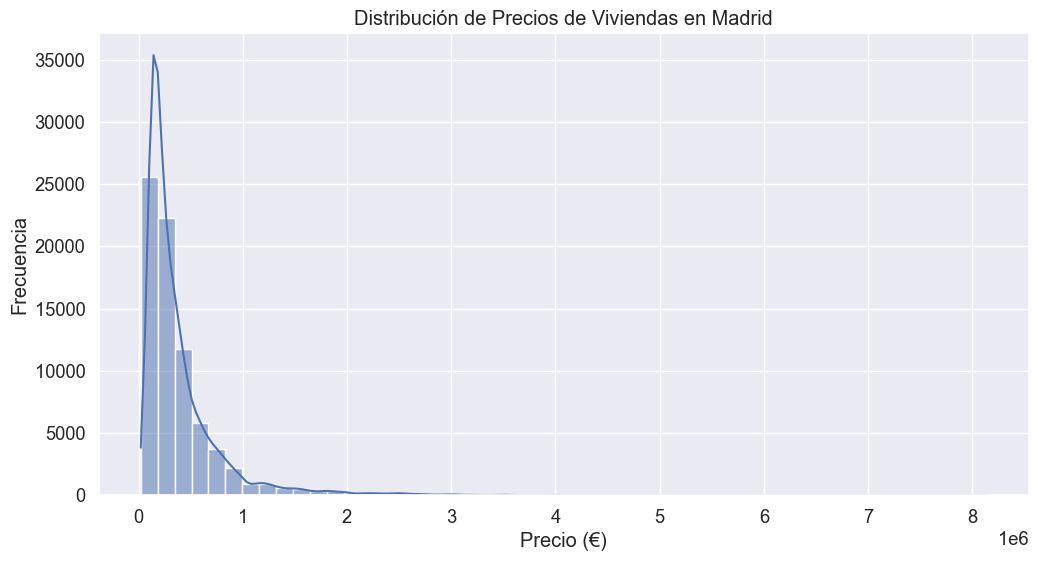

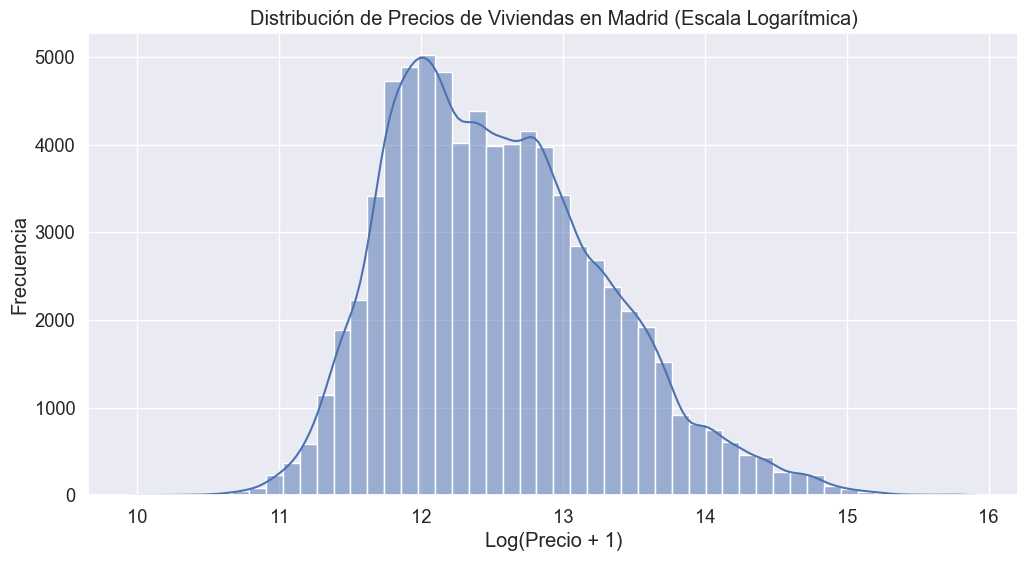

In [7]:
# Análisis de la variable objetivo (PRICE)
print('\n--- ANÁLISIS DE LA VARIABLE OBJETIVO (PRECIO) ---')
print(f'Precio mínimo: {df["PRICE"].min()}')
print(f'Precio máximo: {df["PRICE"].max()}')
print(f'Precio promedio: {df["PRICE"].mean():.2f}')
print(f'Precio mediana: {df["PRICE"].median():.2f}')
print(f'Desviación estándar: {df["PRICE"].std():.2f}')

# Histograma de precios
plt.figure(figsize=(12, 6))
sns.histplot(df['PRICE'], bins=50, kde=True)
plt.title('Distribución de Precios de Viviendas en Madrid')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
plt.savefig('descriptivos/figuras/distribucion_precios.png')

# Histograma de precios (escala logarítmica)
plt.figure(figsize=(12, 6))
sns.histplot(np.log1p(df['PRICE']), bins=50, kde=True)
plt.title('Distribución de Precios de Viviendas en Madrid (Escala Logarítmica)')
plt.xlabel('Log(Precio + 1)')
plt.ylabel('Frecuencia')
plt.savefig('descriptivos/figuras/distribucion_precios_log.png')

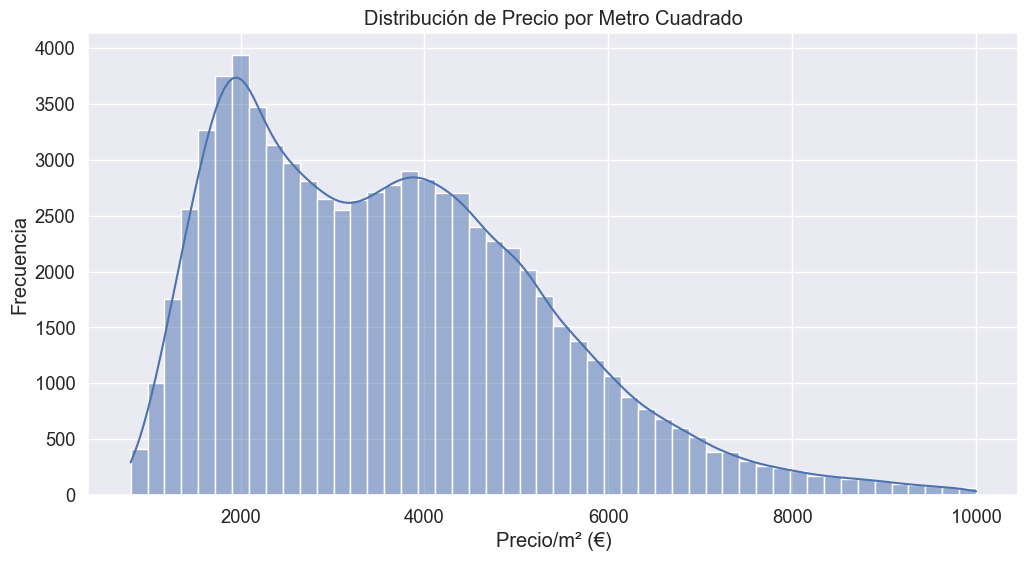

In [8]:
# Análisis de precio por metro cuadrado
plt.figure(figsize=(12, 6))
sns.histplot(df['UNITPRICE'], bins=50, kde=True)
plt.title('Distribución de Precio por Metro Cuadrado')
plt.xlabel('Precio/m² (€)')
plt.ylabel('Frecuencia')
plt.savefig('descriptivos/figuras/distribucion_precio_m2.png')

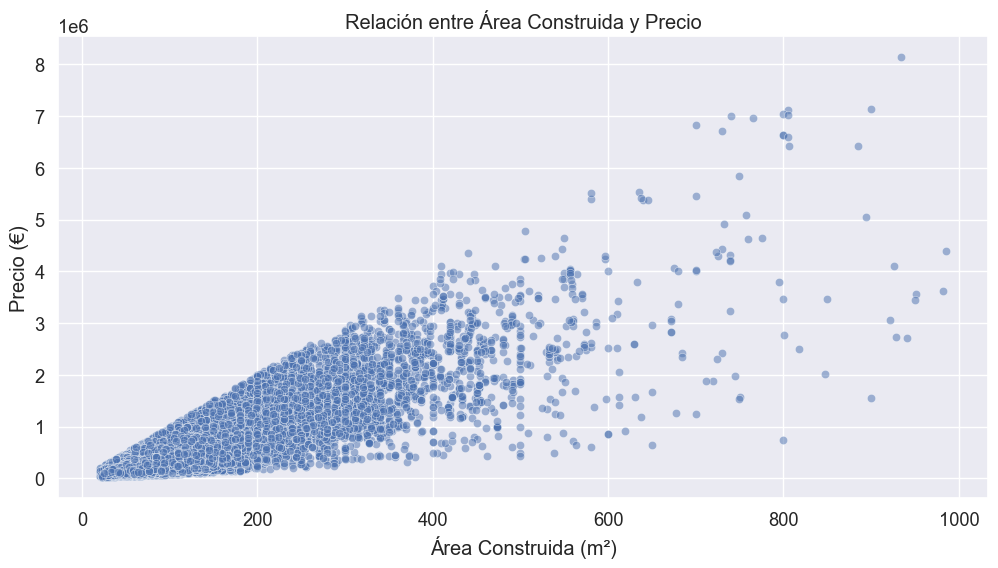

In [9]:
# Relación entre área y precio
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CONSTRUCTEDAREA', y='PRICE', data=df, alpha=0.5)
plt.title('Relación entre Área Construida y Precio')
plt.xlabel('Área Construida (m²)')
plt.ylabel('Precio (€)')
plt.savefig('descriptivos/figuras/relacion_area_precio.png')

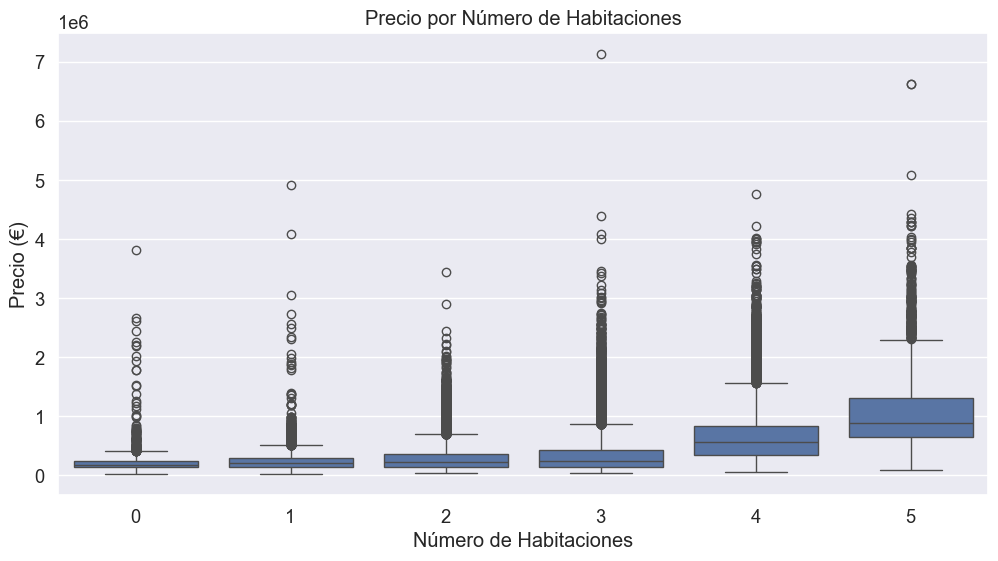

In [10]:
# Relación entre número de habitaciones y precio
plt.figure(figsize=(12, 6))
sns.boxplot(x='ROOMNUMBER', y='PRICE', data=df[df['ROOMNUMBER'] <= 5])
plt.title('Precio por Número de Habitaciones')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio (€)')
plt.savefig('descriptivos/figuras/precio_por_habitaciones.png')

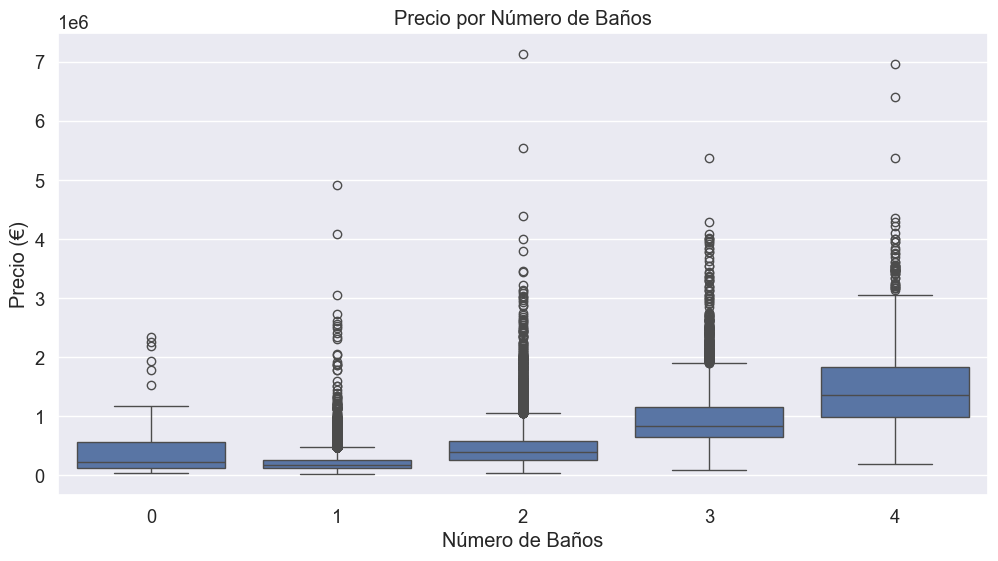

In [11]:
# Relación entre número de baños y precio
plt.figure(figsize=(12, 6))
sns.boxplot(x='BATHNUMBER', y='PRICE', data=df[df['BATHNUMBER'] <= 4])
plt.title('Precio por Número de Baños')
plt.xlabel('Número de Baños')
plt.ylabel('Precio (€)')
plt.savefig('descriptivos/figuras/precio_por_banos.png')

In [12]:
# Análisis de características binarias
binary_cols = ['HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING', 'HASPARKINGSPACE',
               'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL', 'HASDOORMAN',
               'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR']

# Crear un dataframe para almacenar el impacto de características binarias en el precio
binary_impact = pd.DataFrame(columns=['Feature', 'With_Feature_Avg', 'Without_Feature_Avg', 'Price_Difference', 'Percentage_Difference'])

for col in binary_cols:
    with_feature = df[df[col] == 1]['PRICE'].mean()
    without_feature = df[df[col] == 0]['PRICE'].mean()
    diff = with_feature - without_feature
    perc_diff = (diff / without_feature) * 100
    new_row = {
        'Feature': col,
        'With_Feature_Avg': with_feature,
        'Without_Feature_Avg': without_feature,
        'Price_Difference': diff,
        'Percentage_Difference': perc_diff
    }
    # Reemplazar append() con pd.concat()
    binary_impact = pd.concat([binary_impact, pd.DataFrame([new_row])], ignore_index=True)

# Ordenar por impacto porcentual
binary_impact = binary_impact.sort_values('Percentage_Difference', ascending=False)
binary_impact.to_csv('descriptivos/impacto_caracteristicas_binarias.csv', index=False)

/var/folders/c8/4vzgjk5s1rd15q7tw2p8d9040000gn/T/ipykernel_6824/572073050.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  binary_impact = pd.concat([binary_impact, pd.DataFrame([new_row])], ignore_index=True)


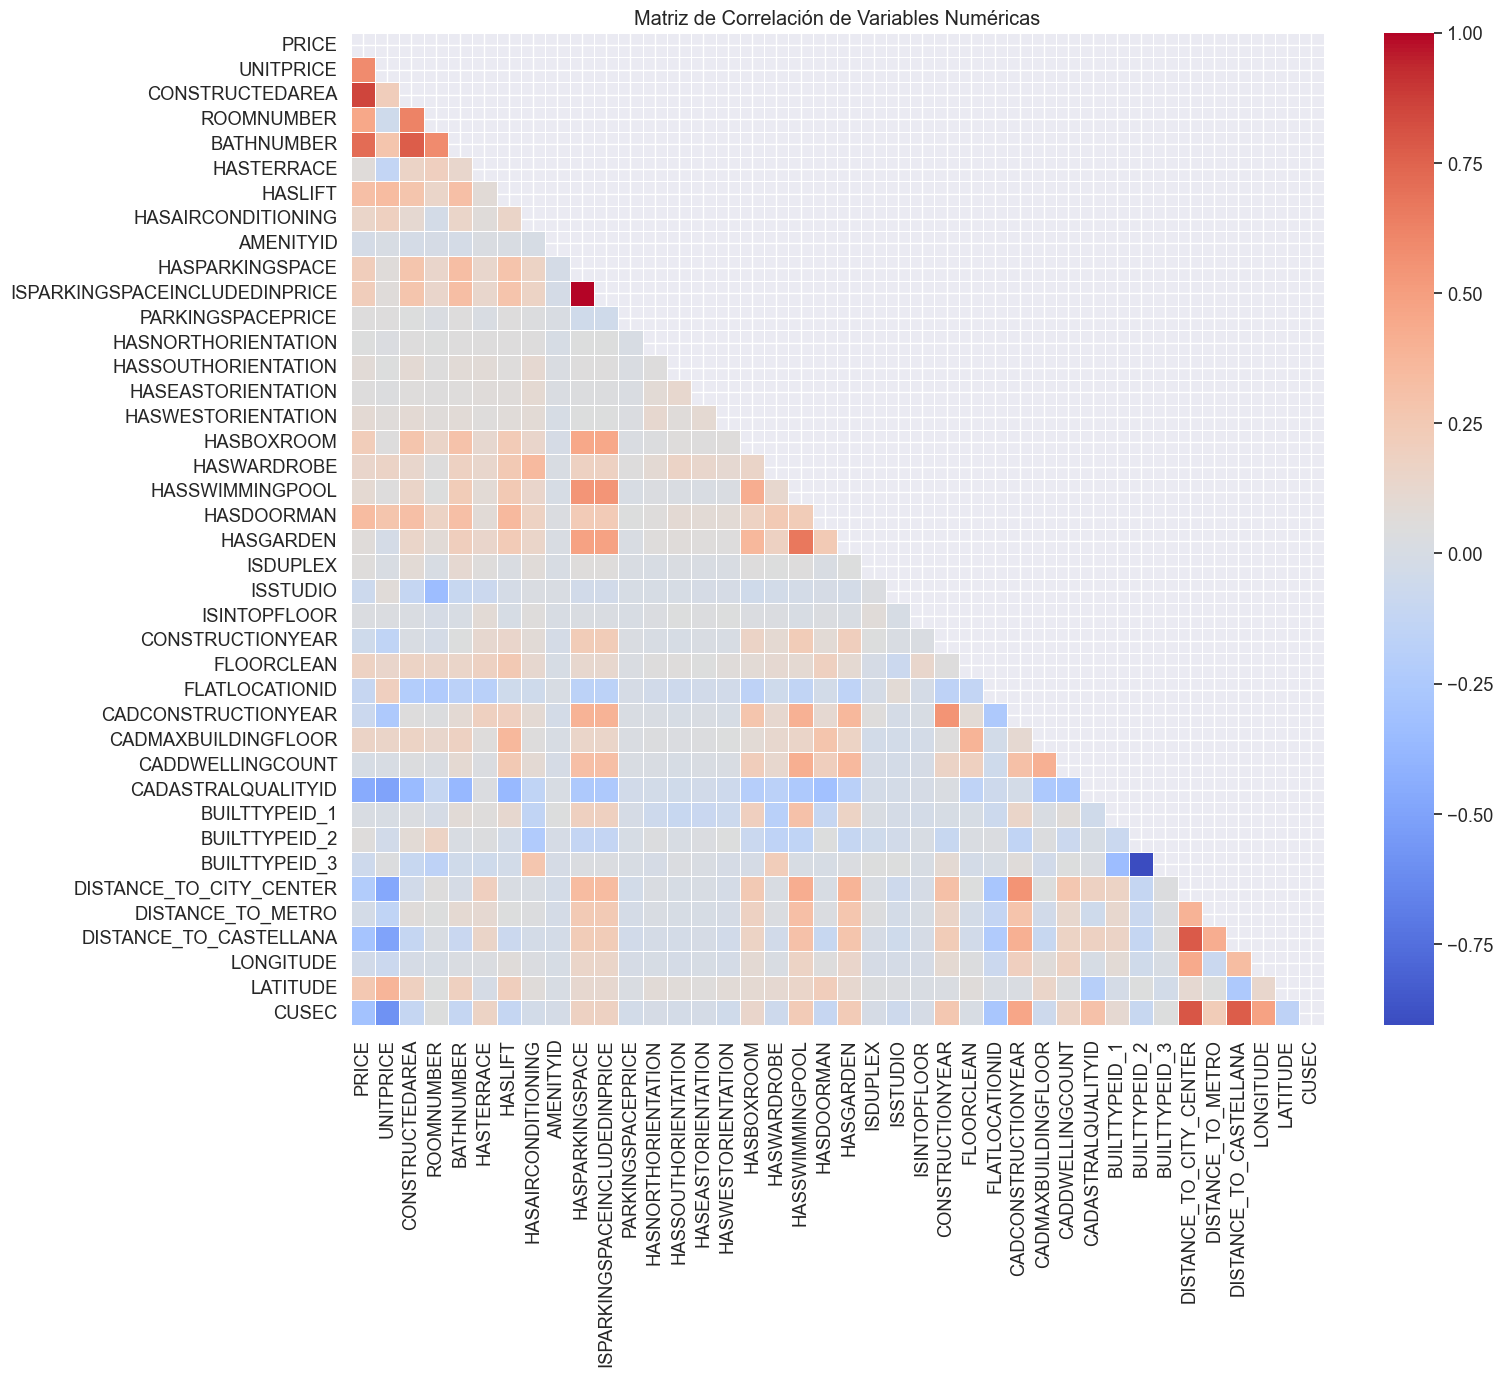

In [13]:
# Matriz de correlación
plt.figure(figsize=(16, 14))
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.tight_layout()
plt.savefig('descriptivos/figuras/matriz_correlacion.png')

In [14]:
# Guardar correlaciones con el precio
price_corr = corr_matrix['PRICE'].sort_values(ascending=False)
price_corr.to_csv('descriptivos/correlaciones_precio.csv')

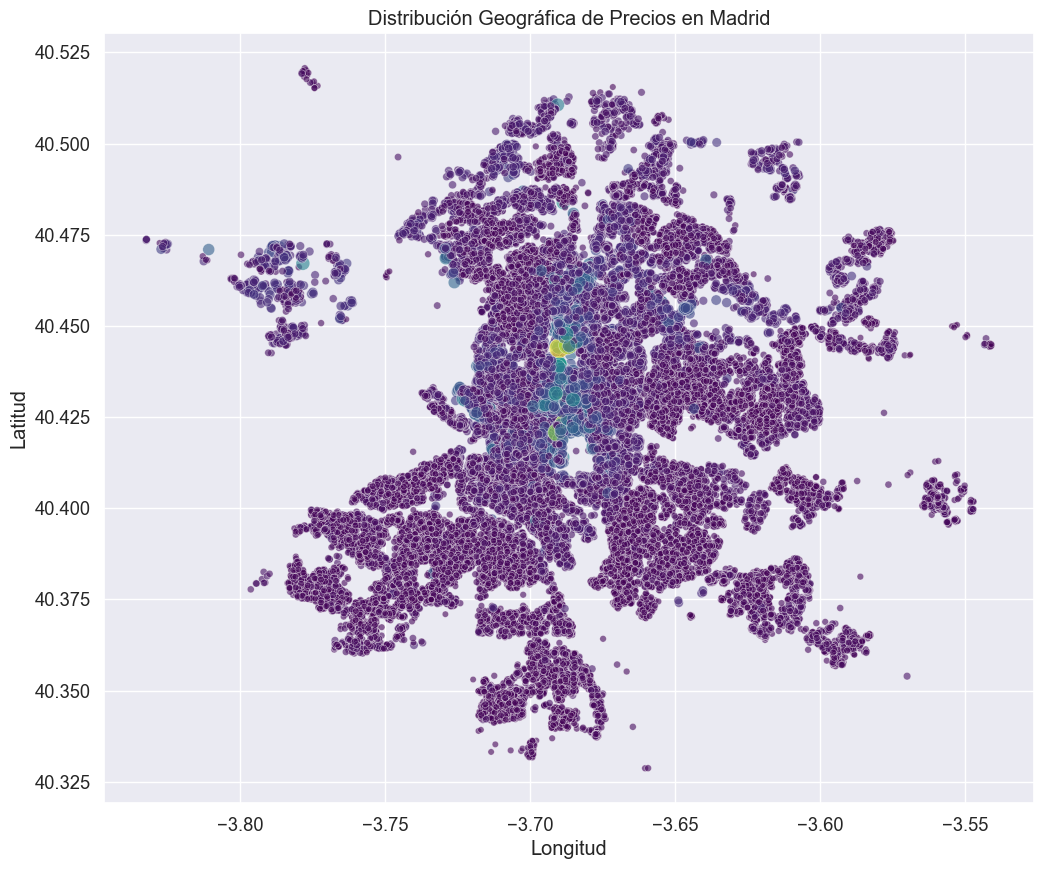

In [15]:
# Análisis de la ubicación
plt.figure(figsize=(12, 10))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='PRICE', data=df, palette='viridis', size='PRICE', sizes=(20, 200), alpha=0.6, legend=False)
plt.title('Distribución Geográfica de Precios en Madrid')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.savefig('descriptivos/figuras/distribucion_geografica.png')

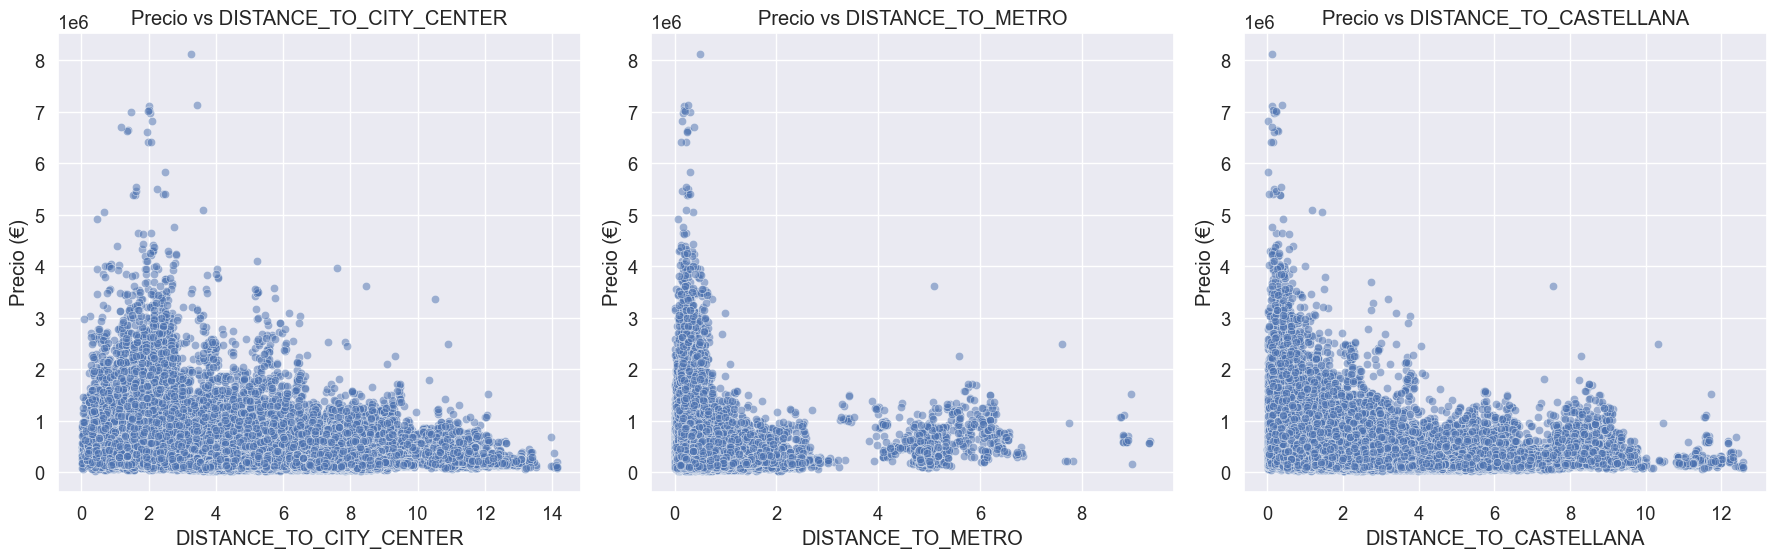

In [16]:
# Análisis de distancias
distance_cols = ['DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 'DISTANCE_TO_CASTELLANA']
plt.figure(figsize=(18, 6))
for i, col in enumerate(distance_cols):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=col, y='PRICE', data=df, alpha=0.5)
    plt.title(f'Precio vs {col}')
    plt.xlabel(col)
    plt.ylabel('Precio (€)')
plt.tight_layout()
plt.savefig('descriptivos/figuras/precio_vs_distancias.png')

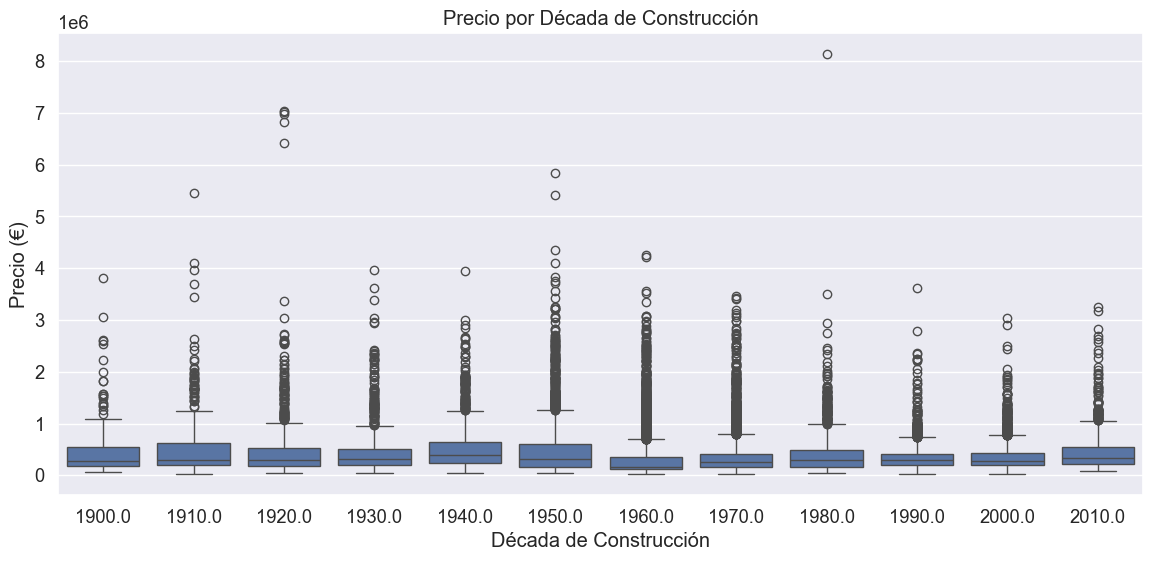

In [17]:
# Análisis del año de construcción
plt.figure(figsize=(14, 6))
df['CONSTRUCTIONYEAR'] = pd.to_numeric(df['CONSTRUCTIONYEAR'], errors='coerce')
construction_year_data = df[df['CONSTRUCTIONYEAR'].notna()].copy()
construction_year_data = construction_year_data[(construction_year_data['CONSTRUCTIONYEAR'] > 1900) & (construction_year_data['CONSTRUCTIONYEAR'] < 2020)]
construction_year_data['DECADE'] = (construction_year_data['CONSTRUCTIONYEAR'] // 10) * 10
sns.boxplot(x='DECADE', y='PRICE', data=construction_year_data)
plt.title('Precio por Década de Construcción')
plt.xlabel('Década de Construcción')
plt.ylabel('Precio (€)')
plt.savefig('descriptivos/figuras/precio_por_decada_construccion.png')

In [18]:
# Resumen de hallazgos
print('\n--- RESUMEN DE HALLAZGOS ---')
print('1. El análisis exploratorio ha sido completado.')
print('2. Se han generado visualizaciones en el directorio "graficos".')
print('3. Se han guardado estadísticas descriptivas en el directorio "datos".')

with open('descriptivos/resumen_exploratorio.txt', 'w') as f:
    f.write('RESUMEN DEL ANÁLISIS EXPLORATORIO DE DATOS\n')
    f.write('==========================================\n\n')
    f.write(f'1. El dataset contiene {df.shape[0]} registros y {df.shape[1]} variables.\n\n')
    f.write('2. Variables con mayor correlación con el precio:\n')
    for idx, (var, corr) in enumerate(price_corr.head(10).items()):
        if var != 'PRICE':
            f.write(f'   - {var}: {corr:.4f}\n')
    f.write('\n3. Estadísticas de la variable objetivo (PRICE):\n')
    f.write(f'   - Precio mínimo: {df["PRICE"].min()}\n')
    f.write(f'   - Precio máximo: {df["PRICE"].max()}\n')
    f.write(f'   - Precio promedio: {df["PRICE"].mean():.2f}\n')
    f.write(f'   - Precio mediana: {df["PRICE"].median():.2f}\n')
    f.write(f'   - Desviación estándar: {df["PRICE"].std():.2f}\n\n')
    f.write('4. Características binarias con mayor impacto en el precio:\n')
    for idx, row in binary_impact.head(5).iterrows():
        f.write(f'   - {row["Feature"]}: {row["Percentage_Difference"]:.2f}% de diferencia\n')
    f.write('\n5. Variables con mayor porcentaje de valores faltantes:\n')
    for idx, (var, perc) in enumerate(missing_percentage.sort_values(ascending=False).head(5).items()):
        if perc > 0:
            f.write(f'   - {var}: {perc:.2f}%\n')

print('\nAnálisis exploratorio completado. Resultados guardados en los directorios "datos" y "graficos".')


--- RESUMEN DE HALLAZGOS ---
1. El análisis exploratorio ha sido completado.
2. Se han generado visualizaciones en el directorio "graficos".
3. Se han guardado estadísticas descriptivas en el directorio "datos".

Análisis exploratorio completado. Resultados guardados en los directorios "datos" y "graficos".


### Conclusiones y Observaciones Adicionales

El análisis realizado permite identificar que el precio de las viviendas en Madrid se relaciona significativamente con variables como el área construida y ciertos atributos binarios. Además, la visualización en escala logarítmica resalta la presencia de valores atípicos y permite una mejor interpretación de la distribución de precios. Estos hallazgos ofrecen una base sólida para futuras fases de modelado y análisis predictivo.